<a href="https://colab.research.google.com/github/teodorachiriac73/PMP-2024/blob/main/lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Output()

Output()

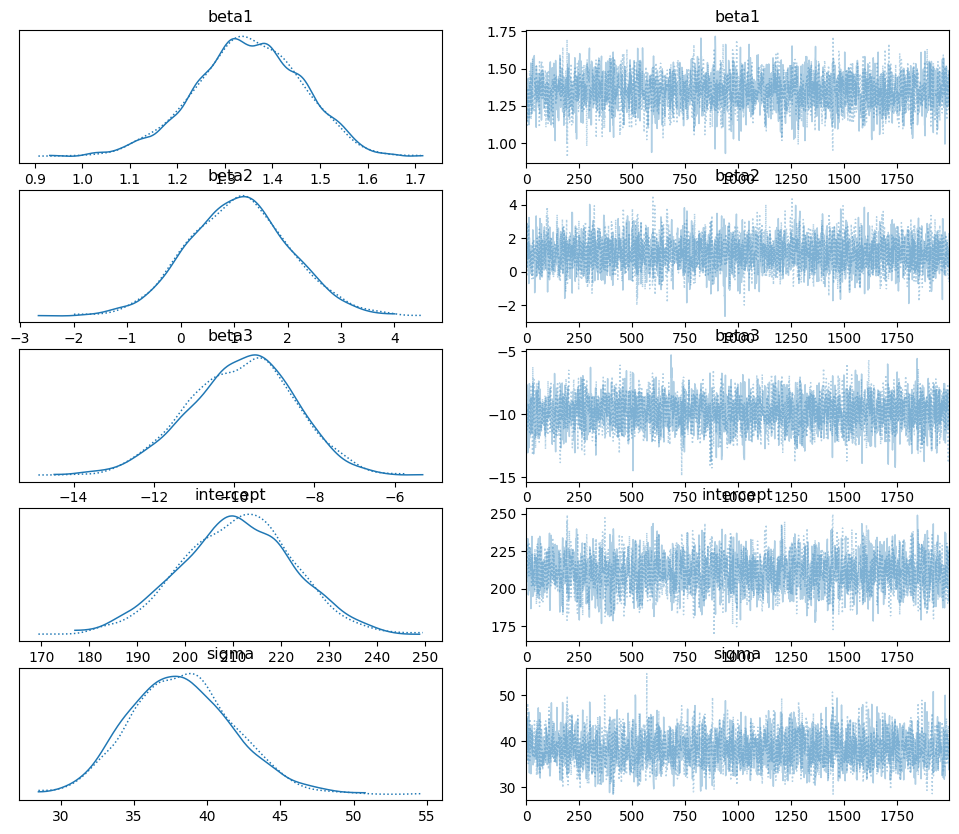

              mean      sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta1        1.349   0.113    1.137    1.558      0.002    0.002    2338.0   
beta2        1.090   0.956   -0.797    2.788      0.017    0.014    3068.0   
beta3       -9.821   1.321  -12.299   -7.380      0.025    0.018    2929.0   
intercept  210.842  11.787  188.357  232.902      0.255    0.181    2142.0   
sigma       38.265   3.512   32.010   44.948      0.072    0.051    2365.0   

           ess_tail  r_hat  
beta1        2463.0    1.0  
beta2        2443.0    1.0  
beta3        2449.0    1.0  
intercept    2283.0    1.0  
sigma        2388.0    1.0  


In [15]:
import pandas as pd
import pymc as pm
import arviz as az
from matplotlib import pyplot as plt

allData = pd.read_csv("/real_estate_data.csv")
distance = pd.to_numeric(allData['Distance_to_center'], errors='coerce')
rooms = pd.to_numeric(allData['Rooms'], errors='coerce')
surface = pd.to_numeric(allData['Surface_area'], errors='coerce')
price = pd.to_numeric(allData['Price'], errors='coerce')


x1 = surface
x2 = rooms
x3 = distance
y = price

with pm.Model() as model:
    intercept = pm.Normal("intercept", mu=y.mean(), sigma=10)
    beta1 = pm.Normal("beta1", mu=x1.mean(), sigma=10)
    beta2 = pm.Normal("beta2",mu=x2.mean(), sigma=1)
    beta3 = pm.Normal("beta3", mu=x3.mean(), sigma=10)
    eps = pm.HalfNormal("sigma", sigma=10)

    mu = intercept + beta1 * x1 + beta2 * x2 + beta3 * x3

    y_obs = pm.Normal("y_obs", mu=mu, sigma=eps, observed=y)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

az.plot_trace(trace)
plt.show()

summary = az.summary(trace)
print(summary)


